In [58]:
import os
import subprocess
import sys
import re
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import hatchet as ht
import thicket as tt

In [18]:
# Set desired pandas options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [20]:
caliDir = "/usr/workspace/pan13/shrimp/Benchmarking/diffusion_2D/arkode_diffusion_2D_mpi_d2d_arkode_serial"
caliFiles = glob.glob("%s/*.cali" % caliDir)

th_bench = tt.Thicket.from_caliperreader(caliFiles)

<AxesSubplot:xlabel='launchdate'>

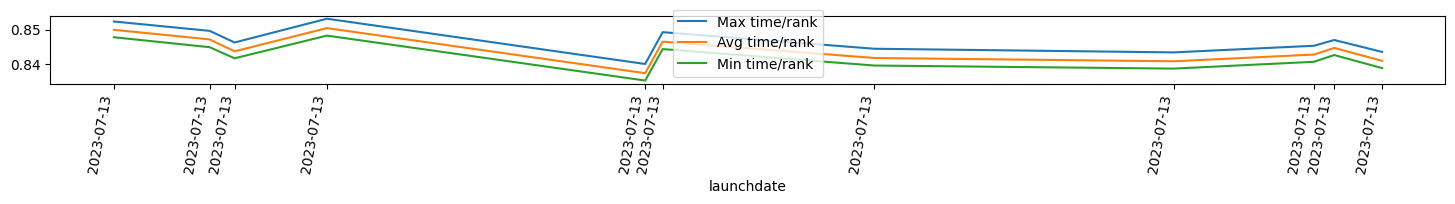

In [66]:
df_merge = th_bench.dataframe.merge(th_bench.metadata, on='profile')
df_merge['launchdate'] = pd.to_datetime(df_merge['launchdate'], unit='s')

# display only the top-most node
df_main = df_merge[df_merge['name'] == 'main']
df_main.set_index('launchdate')

# adjust y-axis to be 2 degrees of precision
df_main.plot(x='launchdate', y=['Max time/rank', 'Avg time/rank', 'Min time/rank'], kind='line', use_index=True, xticks=df_main['launchdate'], rot=80, x_compat=True, figsize=(18,1))
